In [45]:
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd

In [3]:
# bw için sadece 0 veya 1 yolla
def get_0_1_from_triple(temp_1):
    temp = int(temp_1[0] / 3 + temp_1[1] / 3 + temp_1[2] / 3)
    if temp == 0:
        return 0
    else:
        return 1
    
def convert_rgb_to_bw(image):
    m, n, k = image.shape
    new_image = np.zeros((m, n), dtype='uint8')
    for i in range(m):
        for j in range(n):
            s = get_0_1_from_triple(image[i, j, :])
            new_image[i, j] = s
    return new_image

In [4]:
# tüm klasörler
def get_all_folders_in_path(path_=""):
    my_folders = [folder for folder in os.listdir(path_) if os.path.isdir(path_ + '/' + str(folder))]
    return my_folders

# tüm dosyalar
def get_all_files_in_folder(path_=""):
    my_files = [file for file in os.listdir(path_) if os.path.isfile(path_ + '/' + str(file))]
    return my_files

def prepare_all_signatures(path=""):
    folders = get_all_folders_in_path(path)
    size = (200, 200)
    x_list = []
    for i in range(len(folders)):
        png_files = get_all_files_in_folder(path + folders[i])
        for j in range(len(png_files)):
            image = plt.imread(path + folders[i] + '/' + png_files[j])
            resized_image = resize(image, size)
            bw_image = convert_rgb_to_bw(resized_image)
            # print(resized_image.shape)
            # print(png_files[j])
            # print((bw_image.reshape(40000)).shape)
            reshape_image = bw_image.reshape(40000)
            x_list.append(reshape_image)
    return x_list

In [5]:
main_folder = r"/home/cicek/Downloads/data_signature/"
data_set = os.listdir(main_folder)
len(data_set)

37

In [6]:
list = prepare_all_signatures(main_folder)

In [16]:
X = np.asarray(list)
X.shape

(1147, 40000)

In [17]:
X

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

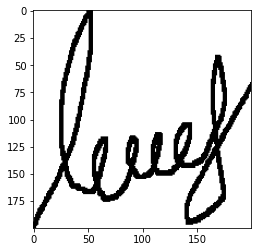

In [18]:
i = 1000
img_1 = (X[i, :]).reshape(200, 200)
# print(y[i])

# resmi göster
plt.imshow(img_1, cmap='gray')
# plt.title(y[i])
plt.show()

In [19]:
def prepare_y(path=""):
    folders = get_all_folders_in_path(path)
    y_list = []
    for i in range(len(folders)):
        png_files = get_all_files_in_folder(path + folders[i])
        for j in range(len(png_files)):
            y_list.append(i)
    return y_list

In [20]:
y_list = prepare_y(main_folder)
y = np.asarray(y_list)
len(y)

1147

In [21]:
y = pd.Series(y, dtype="category")

In [22]:
y.shape

(1147,)

In [23]:
y

0        0
1        0
2        0
3        0
4        0
        ..
1142    36
1143    36
1144    36
1145    36
1146    36
Length: 1147, dtype: category
Categories (37, int64): [0, 1, 2, 3, ..., 33, 34, 35, 36]

In [27]:
digits = 37
examples = y.shape[0]

y = y.values.reshape(examples)
Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [28]:
Y_new.shape

(37, 1147)

In [29]:
Y_new[:, 100]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [30]:
Y_new

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [31]:
m = 1147
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

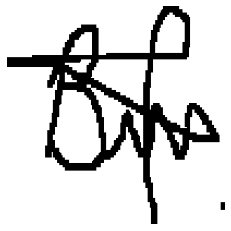

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [32]:
i = 1008
plt.imshow(X_train[:,i].reshape(200,200), cmap = 'gray')
plt.axis("off")
plt.show()
Y_train[:,i]

In [37]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [38]:
# sigmoid fonksiyonu
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [39]:
def compute_loss(Y, Y_hat):
    m = Y.shape[1]
    L = -(1. / m) * (np.sum(np.multiply(np.log(Y_hat + epsilon), Y)) + np.sum(
        np.multiply(np.log(1 - Y_hat + epsilon), (1 - Y))))

    return L

In [40]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  9.764791547896134
Epoch 100 cost:  3.31456794134976
Epoch 200 cost:  1.943154795413788
Epoch 300 cost:  0.775478943164994
Epoch 400 cost:  0.6617614902526636
Epoch 500 cost:  0.5183894942417022
Epoch 600 cost:  0.4158860064807767
Epoch 700 cost:  0.3334993060935396
Epoch 800 cost:  0.2730128044997612
Epoch 900 cost:  0.24860613773905134
Epoch 1000 cost:  0.2239226509036262
Epoch 1100 cost:  0.16543231487458507
Epoch 1200 cost:  0.15261045199837214
Epoch 1300 cost:  0.1338781063535589
Epoch 1400 cost:  0.11835351304191816
Epoch 1500 cost:  0.10537200798520976
Epoch 1600 cost:  0.01642462739001388
Epoch 1700 cost:  0.0131705865194774
Epoch 1800 cost:  0.01214136982240641
Epoch 1900 cost:  0.025569799134451
Final cost: 0.06432507149397704


In [64]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 0  0    0  0  16  0  0  0  4   2 11 57  1  1  4   0     3  4  0  0]
 [ 0  0    0  0   0  0  0  0  1   1  0  0  5  0  1   9     6  2  0  0]
 [ 0  0    0  0   0  0  3  0  0  23  0  4  0  0  0   2     3  2 26  7]
 [ 0  0    0  0   0  0  0  2 15  17  0  0  0  0  0   0    82  0  0 11]
 [ 0  0    0  0   0  0  0  0  1   0  0  0  1  0  0   0     1  2  0  0]
 [ 0  0    0  0   0  0  0  0  0   0  1  0 10  0  0   1     7  1  0  0]
 [ 0  0  966  0   0  0  0  0  5   0  1 11  2  0  0   0     2  1  0  0]
 [ 0  0    0  0   0  0  0  0  0   0  0  0  0  0  0   0     0  0  0  0]
 [ 0  0    0  0   0  0  0  0  0   0  0  0  0  0  0   0     0  0  0  0]
 [ 0  0    0  0   5  0  0  0  0   0  0  0  0  0  0   0   344  0  0  0]
 [ 0  0    0  0   0  1  0  0  0   0  0  0  0  0  0   0     0  0  0  0]
 [ 0  0    0  0   0  0  0  4  0   0  0  0  0  0  0   0     0  0  0  0]
 [ 0  0    0  0   0  0  0  0 12   0  0  0  0  0  0   0    63  0  0  0]
 [ 0  0    0  0   0  0  0  0  0 274  0  0  0  0  0   0     0  0  0  0]
 [ 0  

In [ ]:
# 